<a href="https://colab.research.google.com/github/KORALLLL/MTUCI_EMNIST/blob/main/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import pickle
import matplotlib.pyplot as plt
import matplotlib

In [9]:
datasets = ['Alexander2_dataset.pkl', 'Artem_dataset.pkl', 'Gleb_dataset.pkl', 'Kirill_dataset.pkl', 'Nastya_dataset.pkl']

In [6]:
from google.colab import files

# создаем объект этого класса, применяем метод .upload()
uploaded = files.upload()

Saving Alexander2_dataset.pkl to Alexander2_dataset.pkl
Saving Artem_dataset.pkl to Artem_dataset.pkl
Saving Gleb_dataset.pkl to Gleb_dataset.pkl
Saving Kirill_dataset.pkl to Kirill_dataset.pkl
Saving Nastya_dataset.pkl to Nastya_dataset.pkl


In [7]:
!ls

Alexander2_dataset.pkl	Gleb_dataset.pkl    Nastya_dataset.pkl
Artem_dataset.pkl	Kirill_dataset.pkl  sample_data


In [11]:
file = open(datasets[0], 'rb')
ds = pickle.load(file)
images = ds['data']
labels = ds['targets']
file.close()

for i in range(1, 5):
    file = open(datasets[i], 'rb')
    ds = pickle.load(file)
    temp_images = ds['data']
    temp_labels = ds['targets']
    images = torch.cat([images, temp_images], dim =0)
    labels = torch.cat([labels, temp_labels], dim=0)
    file.close()

In [19]:
classes = {}
for i in labels:
    if str(i.item()) in classes:
        classes[str(i.item())]+=1
    else:
        classes[str(i.item())] = 1

In [42]:
strings = '0123456789abcdefghijklmnpqrstuvwxyz'
label_mapping = {i:strings[i] for i in range(35)}
label_mapping['o'] = 0
strings+='o'
str_labels = [label_mapping[int(i)] for i in classes.keys()]

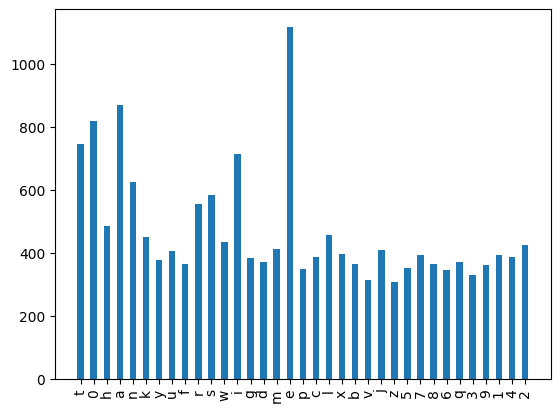

In [44]:
plt.bar(str_labels, classes.values(), width=0.5, align='center')

plt.xticks(rotation=90);

In [47]:
dataset = {'data': images, 'targets': labels}
file = open('dataset.pkl', 'wb')
pickle.dump(dataset, file)
file.close()

In [46]:
labels.shape

torch.Size([16417])